# 1.0-initial-data-exporation_and_preprocessing

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

## Review of source data

Firstly, load our datasets with user's, film's and rating's information and look on it.

In [5]:
# Define the column names for your data
data_columns = ['user_id', 'item_id', 'rating', 'timestamp']
item_columns = ['movie_id', 'movie_title', 'release_date',
                'video_release_date', 'IMDB_URL', 'unknown',
                'Action', 'Adventure', 'Animation', 'Children',
                'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
                'Sci-Fi', 'Thriller', 'War', 'Western']
user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

# Load the training and test sets
train_data = pd.read_csv('data/raw/ml-100k/u1.base', sep='\t', names=data_columns)
test_data = pd.read_csv('data/raw/ml-100k/u1.test', sep='\t', names=data_columns)

# Load the item and user information
item = pd.read_csv('data/raw/ml-100k/u.item', sep='|', names=item_columns, encoding='latin-1')
user = pd.read_csv('data/raw/ml-100k/u.user', sep='|', names=user_columns, encoding='latin-1')

# Merge the dataframes
train_data = pd.merge(train_data, item, how='left', left_on='item_id', right_on='movie_id')
train_data = pd.merge(train_data, user, how='left', on='user_id')

test_data = pd.merge(test_data, item, how='left', left_on='item_id', right_on='movie_id')
test_data = pd.merge(test_data, user, how='left', on='user_id')

In [6]:
# Show films dataset
item

,movie_id,movie_title,release_date,video_release_date,IMDB_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Show users dataset
user

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [5]:
# Show full dataset with all concataneted columns
data = pd.concat([train_data, test_data])
data.reset_index(drop=True, inplace=True)
data

,user_id,item_id,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDB_URL,unknown,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,1,1,5,874965758,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,...,0,0,0,0,0,0,24,M,technician,85711
1,1,2,3,876893171,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,...,0,0,0,1,0,0,24,M,technician,85711
2,1,3,4,878542960,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,...,0,0,0,1,0,0,24,M,technician,85711
3,1,4,3,876893119,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,...,0,0,0,0,0,0,24,M,technician,85711
4,1,5,3,889751712,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,...,0,0,0,1,0,0,24,M,technician,85711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,458,648,4,886395899,648,"Quiet Man, The (1952)",01-Jan-1952,NaN,"http://us.imdb.com/M/title-exact?Quiet%20Man,%...",0,...,0,1,0,0,0,0,47,M,technician,Y1A6B
99996,458,1101,4,886397931,1101,Six Degrees of Separation (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Six%20Degrees...,0,...,1,0,0,0,0,0,47,M,technician,Y1A6B
99997,459,934,3,879563639,934,"Preacher's Wife, The (1996)",13-Dec-1996,NaN,http://us.imdb.com/M/title-exact?Preacher's%20...,0,...,0,0,0,0,0,0,22,M,student,29201
99998,460,10,3,882912371,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,...,0,0,0,0,1,0,44,F,other,60630


In [6]:
# Show null values inside dataset
data.isnull().sum()

user_id                    0
item_id                    0
rating                     0
timestamp                  0
movie_id                   0
movie_title                0
release_date               9
video_release_date    100000
IMDB_URL                  13
unknown                    0
Action                     0
Adventure                  0
Animation                  0
Children                   0
Comedy                     0
Crime                      0
Documentary                0
Drama                      0
Fantasy                    0
Film-Noir                  0
Horror                     0
Musical                    0
Mystery                    0
Romance                    0
Sci-Fi                     0
Thriller                   0
War                        0
Western                    0
age                        0
gender                     0
occupation                 0
zip_code                   0
dtype: int64

## Preprocessing of source data

Drop item_id, timestamp, movie_title, video_release_date, IMDB_URL, zip_code columns because its useless for our analysis.

In [7]:
# Drop useless columns
data.drop(data.columns[[1, 3, 5, 7, 8, 31]], axis=1, inplace=True)
data

,user_id,rating,movie_id,release_date,unknown,Action,Adventure,Animation,Children,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation
0,1,5,1,01-Jan-1995,0,0,0,1,1,1,...,0,0,0,0,0,0,0,24,M,technician
1,1,3,2,01-Jan-1995,0,1,1,0,0,0,...,0,0,0,0,1,0,0,24,M,technician
2,1,4,3,01-Jan-1995,0,0,0,0,0,0,...,0,0,0,0,1,0,0,24,M,technician
3,1,3,4,01-Jan-1995,0,1,0,0,0,1,...,0,0,0,0,0,0,0,24,M,technician
4,1,3,5,01-Jan-1995,0,0,0,0,0,0,...,0,0,0,0,1,0,0,24,M,technician
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,458,4,648,01-Jan-1952,0,0,0,0,0,1,...,0,0,1,0,0,0,0,47,M,technician
99996,458,4,1101,01-Jan-1993,0,0,0,0,0,0,...,0,1,0,0,0,0,0,47,M,technician
99997,459,3,934,13-Dec-1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,M,student
99998,460,3,10,22-Jan-1996,0,0,0,0,0,0,...,0,0,0,0,0,1,0,44,F,other


Now we need to encode textual values. Make ordinal encoding for occupation column, one-hot encoding for gender column and replace release_date on release_year column.

In [8]:
# Use One-Hot encoder to encode categorial values with a low level of uniqueness
ohe_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
feature = ['gender']
ohe_encoder.fit(data[feature])

new_feat = ohe_encoder.transform(data[feature])
new_cols = pd.DataFrame(new_feat, dtype=int, columns=ohe_encoder.get_feature_names(feature))
data = pd.concat([data, new_cols], axis=1)    
data.drop(feature, axis=1, inplace=True)

# Fit and transform the 'occupation' column
encoder = OrdinalEncoder()
data['occupation'] = encoder.fit_transform(data[['occupation']])

# Convert the 'release_date' column to datetime
data['release_date'] = pd.to_datetime(data['release_date'])

# Extract the year and create a new 'release_year' column, drop ald column
data['release_date'].fillna('01-Jan-1980', inplace=True) # fill null "release_date" with 01-Jan-1980
data['release_year'] = data['release_date'].dt.year.astype(int)
data.drop(data.columns[[3]], axis=1, inplace=True)
data

C:\Users\markz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,user_id,rating,movie_id,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Romance,Sci-Fi,Thriller,War,Western,age,occupation,gender_F,gender_M,release_year
0,1,5,1,0,0,0,1,1,1,0,...,0,0,0,0,0,24,19.0,0,1,1995
1,1,3,2,0,1,1,0,0,0,0,...,0,0,1,0,0,24,19.0,0,1,1995
2,1,4,3,0,0,0,0,0,0,0,...,0,0,1,0,0,24,19.0,0,1,1995
3,1,3,4,0,1,0,0,0,1,0,...,0,0,0,0,0,24,19.0,0,1,1995
4,1,3,5,0,0,0,0,0,0,1,...,0,0,1,0,0,24,19.0,0,1,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,458,4,648,0,0,0,0,0,1,0,...,1,0,0,0,0,47,19.0,0,1,1952
99996,458,4,1101,0,0,0,0,0,0,0,...,0,0,0,0,0,47,19.0,0,1,1993
99997,459,3,934,0,0,0,0,0,0,0,...,0,0,0,0,0,22,18.0,0,1,1996
99998,460,3,10,0,0,0,0,0,0,0,...,0,0,0,1,0,44,13.0,1,0,1996


In [9]:
# Check null values again
data.isnull().sum()

user_id         0
rating          0
movie_id        0
unknown         0
Action          0
Adventure       0
Animation       0
Children        0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
age             0
occupation      0
gender_F        0
gender_M        0
release_year    0
dtype: int64

## Visualization

This graph show me the distribution of ratings.

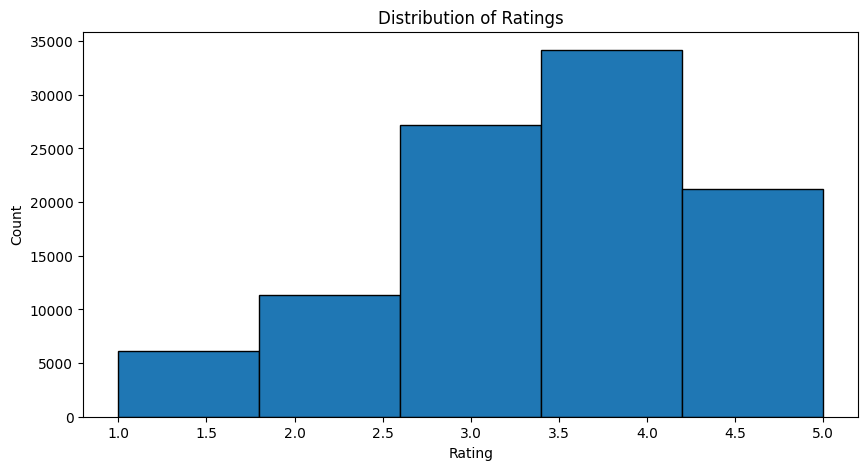

In [10]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 5))
plt.hist(data['rating'], bins=5, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

This graph show me which movies are rated most frequently by users.

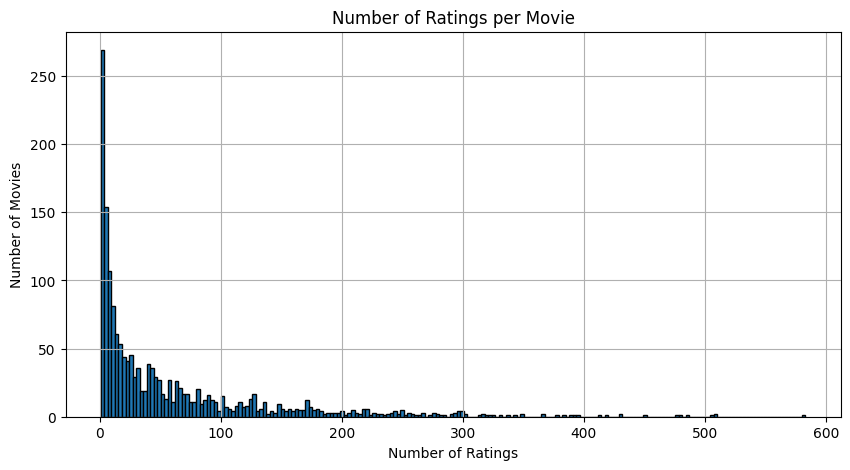

In [12]:
# Plot the number of ratings per movie
plt.figure(figsize=(10, 5))
data.groupby('movie_id')['rating'].count().hist(bins=200, edgecolor='black')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

This graph show me the distribution of the number of ratings per user.

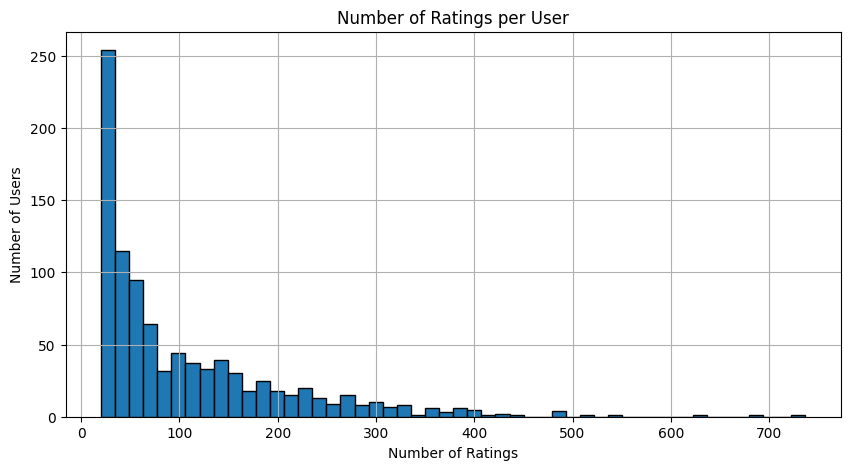

In [13]:
# Plot the number of ratings per user
plt.figure(figsize=(10, 5))
data.groupby('user_id')['rating'].count().hist(bins=50, edgecolor='black')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

## Preserving the prepared data

In [14]:
# Save our "data" dataset for future training and "item" dataset for future benchmark creating.
data.to_csv('data/interim/merged_data.csv', index=False)
item.to_csv('data/interim/movie_info.csv', index=False)